# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



# Task 1

## A.

All of the expected columns are present. However, the data in the dataframe does not match the descriptions given.


To summarise:

| Column        | Do values match decription?                       |
|---------------|---------------------------------------------------|
|product_id     | Yes                                               |
|category       | No, missing values are stored as '-', need to be  |
|               | changed to 'unknown'                              |
|animal         | Yes                                               |
|size           | No, capitilization is not consistant              |
|price          | No, missing values and datatype is not float      |
|sales          | Yes                                               |
|rating         | No, missing ratings need to be replaced with 0    |
|repeat_purchase| Yes                                               |



In [89]:
import pandas as pd

df = pd.read_csv('pet_supplies_2212.csv')
print(df)

      product_id   category animal  ...    sales rating  repeat_purchase
0              1       Food   Bird  ...  1860.62    7.0                1
1              2    Housing   Bird  ...   963.60    6.0                0
2              3       Food    Dog  ...   898.30    5.0                1
3              4   Medicine    Cat  ...   982.15    6.0                1
4              5    Housing    Cat  ...   832.63    7.0                1
...          ...        ...    ...  ...      ...    ...              ...
1495        1496       Food   Bird  ...  1203.36    5.0                0
1496        1497  Equipment    Dog  ...  1099.97    5.0                0
1497        1498       Food   Fish  ...   724.02    3.0                0
1498        1499   Medicine   Fish  ...   658.66    5.0                1
1499        1500       Food    Cat  ...   826.08    4.0                1

[1500 rows x 8 columns]


## B.
Missing values were found using pandas value_counts(), and by aggregating and summing unlisted or null values.


|column           |missing values  |
|-----------------|----------------|
|product_id       |0               |
|category         |25              |
|animal           |0               |
|size             |0               |
|price            |150             |
|sales            |0               |
|rating           |150             |
|repeat_purchase  |0               |

In [90]:

import pandas as pd

df = pd.read_csv('pet_supplies_2212.csv')

print(df.dtypes)
print(df['category'].value_counts())
print(df['animal'].value_counts())
print(df['size'].value_counts())

print(df['rating'].isna().value_counts())
print(df['sales'].isna().value_counts())
print(df['repeat_purchase'].value_counts())

df['price'] = df['price'].astype('string')
print('price - positive numerical values: ' + str(df['price'].str.contains('[0-9]+').sum()))
print('price - unlisted values: ' + str(df['price'].str.contains('unlisted').sum()))


product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64
False    1350
True      150
Name: rating, dtype: int64
False    1500
Name: sales, dtype: int64
1    906
0    594
Name: repeat_purchase, dtype: int64
price - positive numerical values: 1350
price - unlisted values: 150


## C.
### product_id:
product_id did not need to be changed, datatype cast as an integer as this datatype results in faster processing times when compared with the object datatype.

### category:
all missing values ('-') were replaced with the string 'Unknown'. Datatype was recast as a 'category' as there are a finite amount of categories and this will also lead to faster processing times.

### animal:
no changes were needed for the animal column. datatype was cast to a 'category', for the same reason as the category column.

### size:
made the capitilzation consistant across all size categories. the column was then cast as a 'category' datatype for the same reason as the category column.

### price:
all missing values in price were initially changed to a string value of '0', this allowed the column to then be cast as a float. from this point, all 0's were able to be replaced by the overall median price using the replace() method. 

### sales:
no changes were needed for the sales column.

### rating:
used pythons replace function to change missing values of rating to 0. cast the datatype from object to int.

### repeat_purchase:
no changes were needed for the repeat_purchases column.

In [91]:

import pandas as pd
df = pd.read_csv('pet_supplies_2212.csv')

cat_var = ['category', 'animal', 'size']

df['size'] = df['size'].str.capitalize()
df['category'] = df['category'].replace('-', 'Unknown')
df['rating'] = df['rating'].fillna(0)
df[cat_var] = df[cat_var].astype('category')
df['product_id'] = df['product_id'].astype('int')

df['price'] = df['price'].astype('string')
df['price'] = df['price'].replace('unlisted', '0')
df['price'] = df['price'].astype('float')
df['price'] = df['price'].replace(0, df['price'].median())

df.info(verbose=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   int64   
 1   category         1500 non-null   category
 2   animal           1500 non-null   category
 3   size             1500 non-null   category
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1500 non-null   float64 
 7   repeat_purchase  1500 non-null   int64   
dtypes: category(3), float64(3), int64(2)
memory usage: 63.8 KB


## Task 2
### A.
The equipment category has had the most repeat purchases.

### B.
Repeat purchases are not balanced across categories. Unknown has had the least repeat purchases. Following this is the Accessory column which has just under half of the repeat purchases of Food, Housing, Medicine and Toys. Equipment has the most repeat purchases by a margin of ~70.
The repeat purchases were normalised so that the categories could be fairly compared, however this had no visible effect on the count of repeat purchases. 
The repeat purchases are not evenly balanced across all cateogories although, they are evenly balanced across Food, Housing, Medicine and Toys.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('pet_supplies_2212.csv')
cat_var = ['category', 'animal', 'size']
size = 'size'
category = 'category'
rating = 'rating'
product_id = 'product_id'
price = 'price'

def clean_data(df, cat_var, size, category, rating, product_id, price):
    df[size] = df[size].str.capitalize()
    df[category] = df[category].replace('-', 'Unknown')
    df[rating] = df[rating].fillna(0)
    df[cat_var] = df[cat_var].astype('category')
    df[product_id] = df[product_id].astype('int')
    df[price] = df[price].astype('string')
    df[price] = df[price].replace('unlisted', '0')
    df[price] = df[price].astype('float')
    df[price] = df[price].replace(0, df[price].median())
    
    return df

clean_data(df, cat_var, size, category, rating, product_id, price)

print(df)

category_repeat_purchase = df.groupby('category')['repeat_purchase'].sum().reset_index()

category_repeat_purchase['Normalized_Sum'] = category_repeat_purchase['repeat_purchase'] / category_repeat_purchase['repeat_purchase'].sum()



      product_id   category animal  ...    sales  rating  repeat_purchase
0              1       Food   Bird  ...  1860.62     7.0                1
1              2    Housing   Bird  ...   963.60     6.0                0
2              3       Food    Dog  ...   898.30     5.0                1
3              4   Medicine    Cat  ...   982.15     6.0                1
4              5    Housing    Cat  ...   832.63     7.0                1
...          ...        ...    ...  ...      ...     ...              ...
1495        1496       Food   Bird  ...  1203.36     5.0                0
1496        1497  Equipment    Dog  ...  1099.97     5.0                0
1497        1498       Food   Fish  ...   724.02     3.0                0
1498        1499   Medicine   Fish  ...   658.66     5.0                1
1499        1500       Food    Cat  ...   826.08     4.0                1

[1500 rows x 8 columns]


Text(0.5, 1.0, 'Count of Repeat Purchases for each Category')

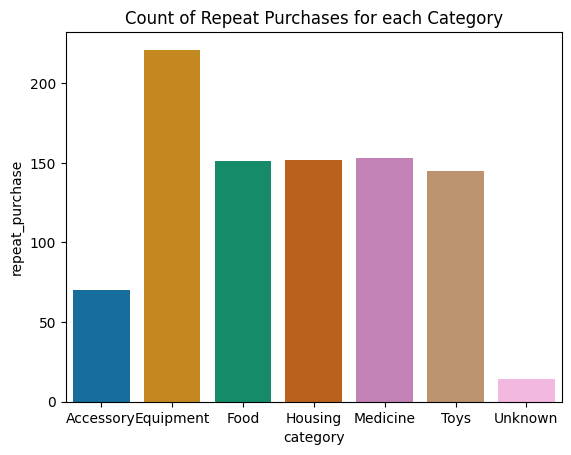

In [2]:

sns.barplot(x='category', y='repeat_purchase', data=category_repeat_purchase, palette='colorblind')

plt.title("Count of Repeat Purchases for each Category")
plt.ylabel("Count of Products That Are Repeatedly Purchased")


Text(0.5, 0, 'Category')

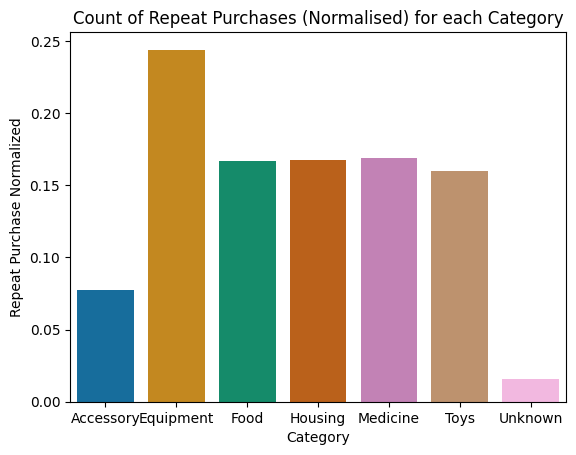

In [3]:

sns.barplot(x='category', y='Normalized_Sum', data=category_repeat_purchase, palette='colorblind')

plt.title("Count of Repeat Purchases (Normalised) for each Category")
plt.ylabel("Repeat Purchase Normalized")
plt.xlabel("Category")


## Task 3

The sales data is multi-modal and slightly positively skewed, with at least two distinct and significant modes. The series mean and median are centered around mode 1  at 1000 \$/yr. Mode 2 is located at 1400 \$/yr. 

Outlier values which are > 2000 $/yr. are due to large amounts of sales for a small number of toy products.

Certain products in the equipment, medicine and housing categories are contributing to the positive skew of the sales distribution. The median value of Toy product sales near mode 2 combined with the positive outliers of the housing, equipment, medicine and the upper quartile of the food category are further contributing to the height of mode 2 in the histogram below.

Toys have higher yearly sales across the entire product range. Also, there are a small number of products in the Equipment, Housing and Medicine categories which are generating higher yearly sales than other products in the same categories.

Text(29.000000000000007, 0.5, 'Frequency')

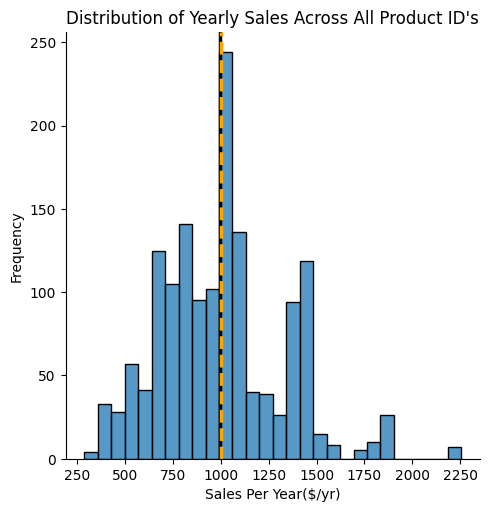

In [4]:

g = sns.displot(data=df, x='sales', palette='colorblind', facet_kws=dict(sharey=False, sharex=False))

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)
    
g.map(specs, 'sales')

plt.title("Distribution of Yearly Sales Across All Product ID's")
plt.xlabel("Sales Per Year ($/ yr.)")
plt.ylabel("Frequency")


Text(0.5, 0, 'Category')

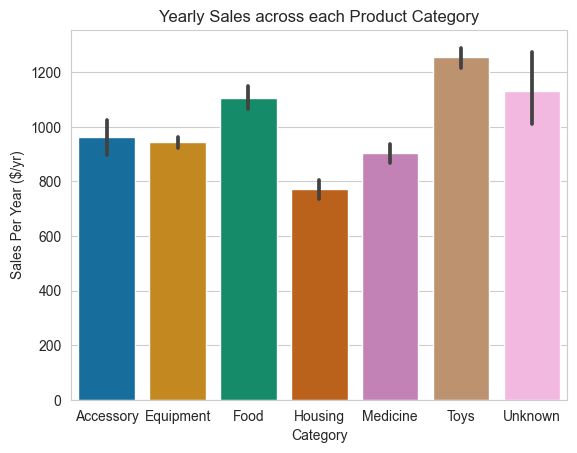

In [51]:

sns.barplot(data=df, x='category', y='sales', palette='colorblind')

plt.title("Yearly Sales Across Each Product Category")
plt.ylabel("Sales Per Year ($/ yr.)")
plt.xlabel("Category")


Text(0.5, 0, 'Category')

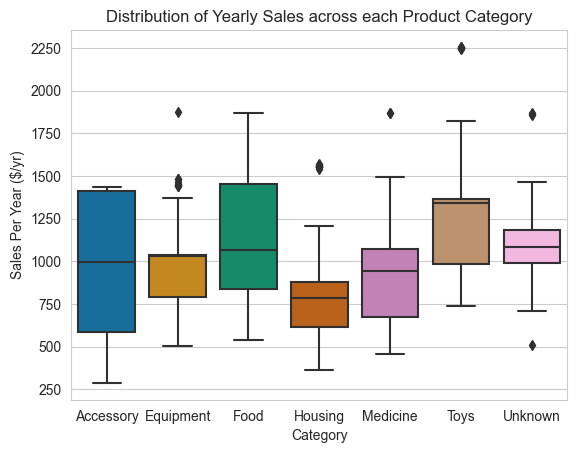

In [52]:

sns.boxplot(data=df, x='category', y='sales', palette='colorblind')

plt.title("Distribution Of Yearly Sales Across Each Product Category")
plt.ylabel("Sales Per Year ($/ yr.)")
plt.xlabel("Category")


## Task 4

The data can be seperated into products that customers repeatedly purchase and products that customers do not repeatedly purchase. Sales data for the two groups were compared and they share very similar distributions. There is significant overlap and the median value is slightly higher for products that are not repeatedly purchased.



Products that are repeatedly sold have a greater sum total than products that are not repeatedly sold.

The kernel density estimation plot for each group was visualized and the distributions are very near identical. The distributions are identical to the distribution of all of the sales, as described in task 3. The difference in sum total sales is due to a higher count of products that are repeatedly sold.

When analysing per category, only the Food and Housing categories have higher median yearly sales for products which are repeatedly purchased by customers. 

The pointplot - much like the boxplot earlier - shows that there is significant overlap between the two groups of data, as well as a very slight negative correlation between repeatedly purchased products and yearly sales values. The slight negative correlation is much easier to see when the data is visualized with the point plot. 

One measure of strength of association between a nominal and continuous variable is the Point-Biserial Correlation Coefficient. Like all Correlation Coefficients (e.g.  Pearson’s r, Spearman’s rho), the Point-Biserial Correlation Coefficient measures the strength of association of two variables in a single measure ranging from -1 to +1, where -1 indicates a perfect negative association, +1 indicates a perfect positive association and 0 indicates no association at all. When calculating the Point-Biserial Correlation using the pointbiserialr method in the scipy.stats module, there was a correlation of -0.07943499269258511. As this value is so close to 0, this indicates that there is no association at all between sales per year and whether the product is repeatedly purchased or not. 

The cumulative total of sales is greater for products which are repeatedly sold but it is evident that this is only because there is a greater count of products in this category. There is no statistically significant association between yearly sales and whether or not a product is repeatedly purchased by customers.

Text(0, 0.5, 'Sales ($/yr)')

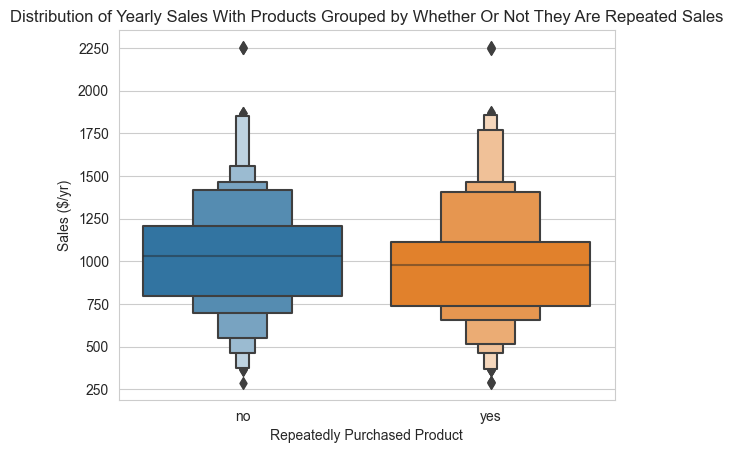

In [54]:

sns.boxenplot(data=df, y='sales', x='repeat_purchase')

plt.xlabel('Repeatedly Purchased Product')
locs, labels = plt.xticks()
plt.xticks(locs, ['No', 'Yes'])
plt.title("Distribution of Yearly Sales With Products Grouped by Whether Or Not They Are Repeatedly Purchased")
plt.ylabel("Sales ($/ yr.)")


Text(0, 0.5, 'Sales ($/yr)')

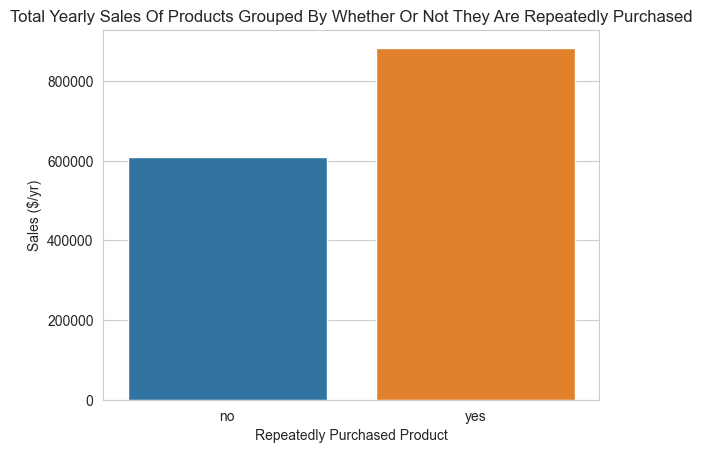

In [57]:

repeat_purchase_sales = df.groupby('repeat_purchase').sum('sales').reset_index()

sns.barplot(data=repeat_purchase_sales, x='repeat_purchase', y='sales')

plt.title("Total Yearly Sales Of Products Grouped By Whether Or Not They Are Repeatedly Purchased")
plt.xlabel('Repeatedly Purchased Product')
locs, labels = plt.xticks()
plt.xticks(locs, ['No', 'Yes'])
plt.ylabel("Sales ($/ yr.)")


Text(0.5, 9.444444444444438, 'Sales ($/ yr.)')

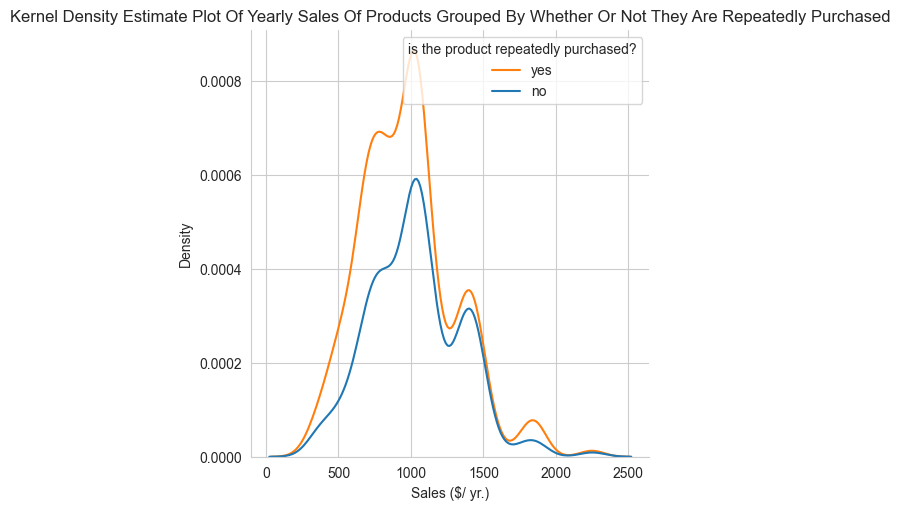

In [55]:

sns.displot(data=df, x='sales', hue='repeat_purchase', kind='kde', facet_kws={'sharex' : False}, legend=None)

plt.legend(title='is the product repeatedly purchased?', labels=['Yes', 'No'], loc=1)

plt.title("Kernel Density Estimate Plot Of Yearly Sales Of Products Grouped By Whether Or Not They Are Repeatedly Purchased")
plt.xlabel("Sales ($/ yr.)")


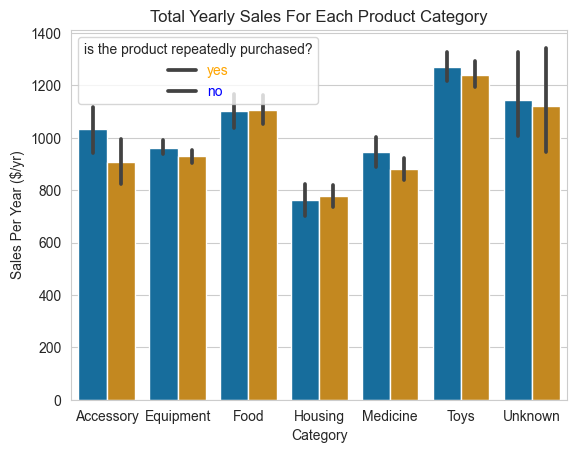

In [23]:

import seaborn.objects as so

repeat_purchase_sales_by_cat = df.groupby(['category','repeat_purchase']).sum('sales').reset_index()

repeat_purchase_sales_by_cat['repeat_purchase'] = repeat_purchase_sales_by_cat['repeat_purchase'].replace(0, 'no')

repeat_purchase_sales_by_cat['repeat_purchase'] = repeat_purchase_sales_by_cat['repeat_purchase'].replace(1, 'yes')

sns.set_style('whitegrid')
sns.barplot(data=df, x='category', y='sales', hue='repeat_purchase', palette='colorblind')

plt.legend(title='is the product repeatedly purchased?', labels=['Yes', 'No'], labelcolor=['orange', 'blue'], loc=0)
plt.title("Total Yearly Sales For Each Product Category")
plt.xlabel("Category")
plt.ylabel("Sales Per Year ($/ yr.)")
plt.show()


PointbiserialrResult(correlation=-0.07943499269258511, pvalue=0.0020783246427287854)

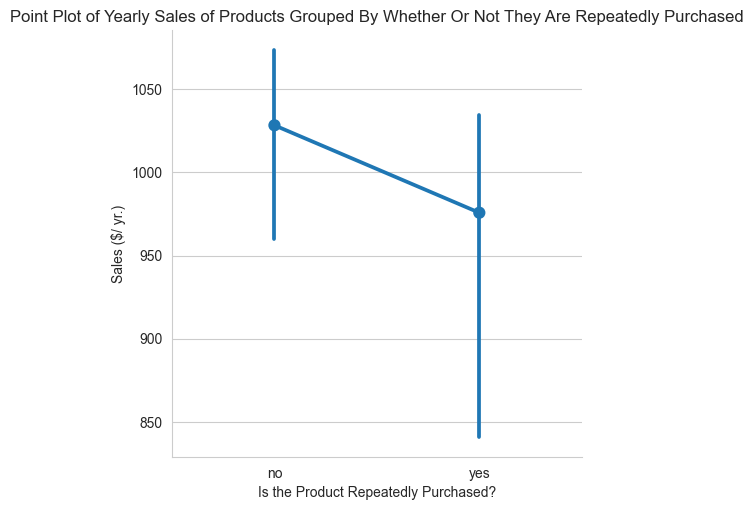

In [56]:

from scipy import stats

sns.catplot(data=df, x='repeat_purchase', y='sales', kind='point', 
            errorbar=('pi',25))

plt.xlabel('Is the Product Repeatedly Purchased?')
locs, labels = plt.xticks()
plt.xticks(locs, ['No', 'Yes'])
plt.ylabel("Sales ($/ yr.)")
plt.title("Point Plot of Yearly Sales of Products Grouped By Whether Or Not They Are Repeatedly Purchased")

stats.pointbiserialr(df['sales'], df['repeat_purchase'])


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam